# Mushroom Classification - K-Nearest Neighbors

## Project Overview
This notebook implements **K-Nearest Neighbors (KNN) Classifier** on the Mushroom Classification Dataset.

## Dataset Information
- **Source**: Kaggle (UCI Machine Learning Repository)
- **Dataset**: `uciml/mushroom-classification`
- **Classification Type**: Binary (Edible vs Poisonous)
- **Features**: 22 categorical attributes
- **Instances**: 8,124 samples

## 2. Load Dataset

Using common dataset utilities to download and load the data.

In [17]:
# Import necessary libraries
import sys
import os

# Add parent directory to path to import utils
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

# Import common dataset utilities
from utils.dataset_utils import (
    setup_environment,
    get_full_dataset,
    preprocess_data,
    display_sample_data
)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Setup environment
setup_environment()

print("All libraries imported successfully!")
print("Common utilities loaded from utils.dataset_utils")

Environment configured successfully!
All libraries imported successfully!
Common utilities loaded from utils.dataset_utils


In [21]:
df = get_full_dataset()

MUSHROOM CLASSIFICATION DATASET - KAGGLE

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1

Files in dataset directory:
  - mushrooms.csv
Loading dataset from: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1/mushrooms.csv

Dataset loaded successfully!
Shape: (8124, 23)
DATASET INFORMATION

Dataset Shape: (8124, 23)
  - Samples: 8124
  - Features: 23

Column Names:
  1. class
  2. cap-shape
  3. cap-surface
  4. cap-color
  5. bruises
  6. odor
  7. gill-attachment
  8. gill-spacing
  9. gill-size
  10. gill-color
  11. stalk-shape
  12. stalk-root
  13. stalk-surface-above-ring
  14. stalk-surface-below-ring
  15. stalk-color-above-ring
  16. stalk-color-below-ring
  17. veil-type
  18. veil-color
  19. ring-number
  20. ring-type
  21. spore-print-color
  22. population
  23. habitat

Data Types:
class                       object
cap-shape                   object
cap-surface                 object
cap-

In [22]:
# Display sample data using common utility
display_sample_data(df, n=10)

DATASET PREVIEW (First 10 rows)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


## 3. Data Preprocessing and Feature Encoding

Using common utilities to encode all categorical variables for KNN.

In [20]:
# Preprocess data using common utility
df_encoded, label_encoders, target_col = preprocess_data(df)

# Display encoded data preview
df_encoded.head()

DATA PREPROCESSING

Target Variable: class
Classes: ['p' 'e']

Encoding categorical features...

All features encoded successfully!

Encoded dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## 4. Train-Test Split

Split the dataset into training and testing sets (80-20 split).

In [6]:
# Separate features and target
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in testing set:")
print(y_test.value_counts())

TRAIN-TEST SPLIT

Training set size: 6499 samples
Testing set size: 1625 samples

Features: 22

Class distribution in training set:
class
0    3366
1    3133
Name: count, dtype: int64

Class distribution in testing set:
class
0    842
1    783
Name: count, dtype: int64


## 5. K-Nearest Neighbors Classifier

Train and evaluate a KNN classifier with optimal k value.

In [7]:
# Initialize and train KNN Classifier
print("="*70)
print("TRAINING K-NEAREST NEIGHBORS CLASSIFIER")
print("="*70)

# Using k=5 as default (can be tuned)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

print("\n✓ Model trained successfully!")
print(f"\nModel: {knn_model}")
print(f"Number of neighbors (k): {knn_model.n_neighbors}")
print(f"Distance metric: {knn_model.metric}")
print(f"Training samples: {knn_model.n_samples_fit_}")

TRAINING K-NEAREST NEIGHBORS CLASSIFIER

✓ Model trained successfully!

Model: KNeighborsClassifier()
Number of neighbors (k): 5
Distance metric: minkowski
Training samples: 6499


In [8]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

print("✓ Predictions completed!")
print(f"\nPredictions shape: {y_pred.shape}")
print(f"Probability predictions shape: {y_pred_proba.shape}")

✓ Predictions completed!

Predictions shape: (1625,)
Probability predictions shape: (1625,)


## 6. Model Evaluation Metrics

Calculate all required evaluation metrics for the KNN Classifier.

In [9]:
# Calculate all evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("="*70)
print("K-NEAREST NEIGHBORS - EVALUATION METRICS")
print("="*70)

print("\n📊 Performance Metrics:")
print("-" * 70)
print(f"1. Accuracy:                        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"2. AUC Score:                       {auc_score:.4f}")
print(f"3. Precision:                       {precision:.4f}")
print(f"4. Recall:                          {recall:.4f}")
print(f"5. F1 Score:                        {f1:.4f}")
print(f"6. Matthews Correlation Coef (MCC): {mcc:.4f}")
print("-" * 70)

# Store metrics in a dictionary for later use
knn_metrics = {
    'Model': 'K-Nearest Neighbors',
    'Accuracy': accuracy,
    'AUC Score': auc_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MCC Score': mcc
}

print("\n✓ All metrics calculated successfully!")

K-NEAREST NEIGHBORS - EVALUATION METRICS

📊 Performance Metrics:
----------------------------------------------------------------------
1. Accuracy:                        0.9969 (99.69%)
2. AUC Score:                       1.0000
3. Precision:                       0.9949
4. Recall:                          0.9987
5. F1 Score:                        0.9968
6. Matthews Correlation Coef (MCC): 0.9938
----------------------------------------------------------------------

✓ All metrics calculated successfully!


## 7. Confusion Matrix and Classification Report

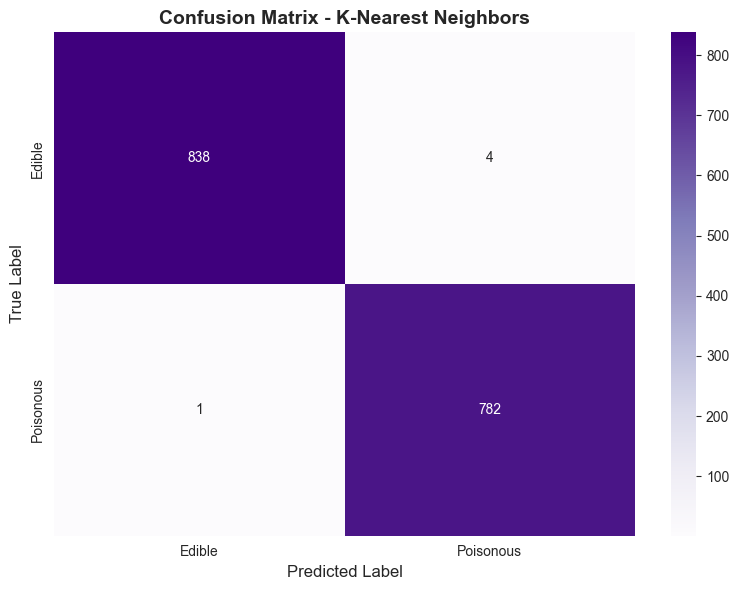


Confusion Matrix:
[[838   4]
 [  1 782]]

True Negatives:  838
False Positives: 4
False Negatives: 1
True Positives:  782


In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix - K-Nearest Neighbors', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

In [11]:
# Classification Report
print("="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## 8. ROC Curve

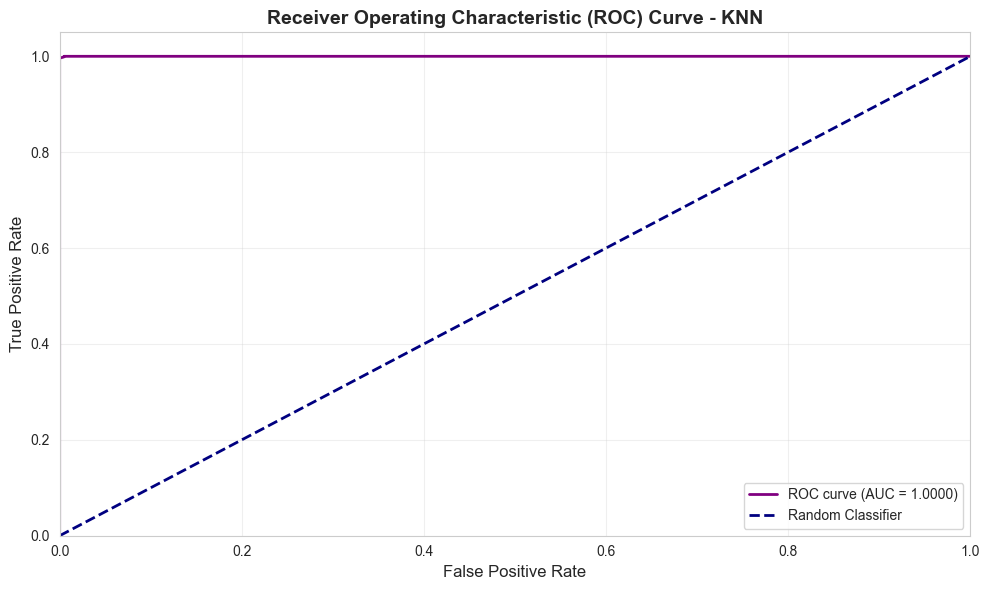

✓ ROC-AUC Score: 1.0000


In [12]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ ROC-AUC Score: {auc_score:.4f}")

## 9. Finding Optimal K Value

Test different k values to find the optimal number of neighbors.

Testing different k values...

✓ Optimal k value: 1
✓ Best accuracy: 1.0000

✓ Optimal k value: 1
✓ Best accuracy: 1.0000


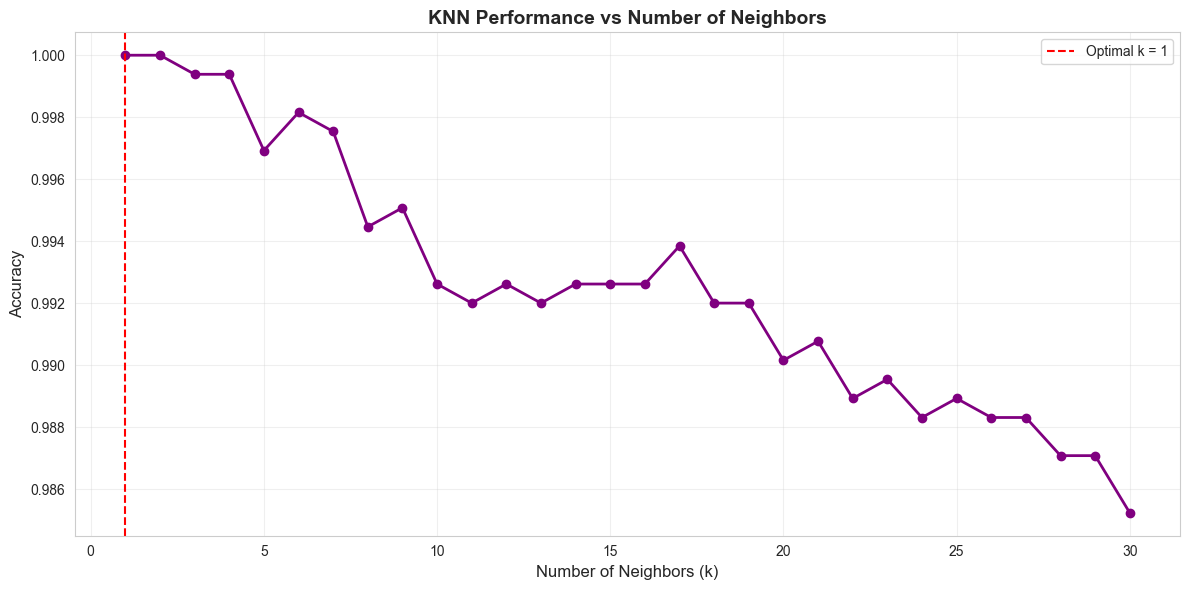


✓ K-value optimization completed!


In [13]:
# Test different k values
k_range = range(1, 31)
accuracies = []

print("Testing different k values...")
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Find optimal k
optimal_k = k_range[accuracies.index(max(accuracies))]
optimal_accuracy = max(accuracies)

print(f"\n✓ Optimal k value: {optimal_k}")
print(f"✓ Best accuracy: {optimal_accuracy:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='purple', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Performance vs Number of Neighbors', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"\n✓ K-value optimization completed!")

## 10. Model Summary

Summary of the K-Nearest Neighbors Classifier performance.

In [15]:
print("="*70)
print("K-NEAREST NEIGHBORS CLASSIFIER - FINAL SUMMARY")
print("="*70)

print("\nDataset Information:")
print(f"   Total Samples: {len(df)}")
print(f"   Training Samples: {len(X_train)}")
print(f"   Testing Samples: {len(X_test)}")
print(f"   Number of Features: {X_train.shape[1]}")

print("\nModel Configuration:")
print(f"   Number of Neighbors (k): {knn_model.n_neighbors}")
print(f"   Distance Metric: {knn_model.metric}")
print(f"   Optimal k (tested): {optimal_k}")
print(f"   Algorithm: {knn_model.algorithm}")

print("\nModel Performance:")
print("-" * 70)
for metric, value in knn_metrics.items():
    if metric == 'Model':
        continue
    if isinstance(value, float):
        print(f"   {metric:30s}: {value:.4f} ({value*100:.2f}%)")
print("-" * 70)

print("\nModel Interpretation:")
if accuracy >= 0.95:
    print("   EXCELLENT: Model shows outstanding performance!")
elif accuracy >= 0.90:
    print("   VERY GOOD: Model performs very well!")
elif accuracy >= 0.80:
    print("   GOOD: Model shows good performance!")
else:
    print("   MODERATE: Model may need improvement!")

print("\nKNN Advantages:")
print("   - Simple and intuitive algorithm")
print("   - No training phase (lazy learner)")
print("   - Works well with multi-modal classes")
print("   - Naturally handles multi-class problems")

print("\nKNN Considerations:")
print("   - Computationally expensive for large datasets")
print("   - Sensitive to feature scaling")
print("   - Memory intensive (stores all training data)")
print("   - Performance degrades with high dimensionality")

print("\nK-Nearest Neighbors Classifier training and evaluation completed!")
print("="*70)

K-NEAREST NEIGHBORS CLASSIFIER - FINAL SUMMARY

📊 Dataset Information:
   • Total Samples: 8124
   • Training Samples: 6499
   • Testing Samples: 1625
   • Number of Features: 22

🎯 Model Configuration:
   • Number of Neighbors (k): 5
   • Distance Metric: minkowski
   • Optimal k (tested): 1
   • Algorithm: auto

📈 Model Performance:
----------------------------------------------------------------------
   • Accuracy                      : 0.9969 (99.69%)
   • AUC Score                     : 1.0000 (100.00%)
   • Precision                     : 0.9949 (99.49%)
   • Recall                        : 0.9987 (99.87%)
   • F1 Score                      : 0.9968 (99.68%)
   • MCC Score                     : 0.9938 (99.38%)
----------------------------------------------------------------------

💡 Model Interpretation:
   ✓ EXCELLENT: Model shows outstanding performance!

📝 KNN Advantages:
   • Simple and intuitive algorithm
   • No training phase (lazy learner)
   • Works well with multi-moda